In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests
from datetime import datetime
from citipy import citipy
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

666

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold weather data for each city
city_data = []

# Print a message to indicate that the data retrieval starts
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters and set them to 1
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data for each city
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create an endpoint URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        #pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | krasnozavodsk
Processing Record 5 of Set 1 | seoul
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | silvino lobos
Processing Record 11 of Set 1 | ngunguru
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | tateyama
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 18 of Set 1 | altay
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 

Processing Record 39 of Set 4 | pueblo nuevo
Processing Record 40 of Set 4 | kununurra
Processing Record 41 of Set 4 | ugoofaaru
Processing Record 42 of Set 4 | mar del plata
Processing Record 43 of Set 4 | zhanatas
City not found. Skipping...
Processing Record 44 of Set 4 | ranau
Processing Record 45 of Set 4 | byron bay
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | naze
Processing Record 48 of Set 4 | muisne
Processing Record 49 of Set 4 | dikson
Processing Record 50 of Set 4 | satitoa
City not found. Skipping...
Processing Record 1 of Set 5 | korla
Processing Record 2 of Set 5 | pozo colorado
Processing Record 3 of Set 5 | baruun-urt
Processing Record 4 of Set 5 | mildura
Processing Record 5 of Set 5 | baykit
Processing Record 6 of Set 5 | ornskoldsvik
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | homer
Processing Record 9 of Set 5 | kozluk
Processing Record 10 of Set 5 | ponta do sol
Processing Record 11 of Set 5 | teguldet
Proc

Processing Record 31 of Set 8 | coihaique
Processing Record 32 of Set 8 | ajaccio
Processing Record 33 of Set 8 | nanortalik
Processing Record 34 of Set 8 | rawson
Processing Record 35 of Set 8 | chake chake
Processing Record 36 of Set 8 | egvekinot
Processing Record 37 of Set 8 | cedar city
Processing Record 38 of Set 8 | dingzhou
Processing Record 39 of Set 8 | bilibino
Processing Record 40 of Set 8 | yenagoa
Processing Record 41 of Set 8 | bayanday
Processing Record 42 of Set 8 | aflu
City not found. Skipping...
Processing Record 43 of Set 8 | jarjis
City not found. Skipping...
Processing Record 44 of Set 8 | namibe
Processing Record 45 of Set 8 | lamu
Processing Record 46 of Set 8 | iranshahr
Processing Record 47 of Set 8 | thompson
Processing Record 48 of Set 8 | lazaro cardenas
Processing Record 49 of Set 8 | constitucion
Processing Record 50 of Set 8 | zimovniki
Processing Record 1 of Set 9 | hamilton
Processing Record 2 of Set 9 | port augusta
Processing Record 3 of Set 9 | pla

Processing Record 18 of Set 12 | boguchany
Processing Record 19 of Set 12 | baijiantan
Processing Record 20 of Set 12 | deniliquin
Processing Record 21 of Set 12 | mawlaik
Processing Record 22 of Set 12 | zhezkazgan
Processing Record 23 of Set 12 | stornoway
Processing Record 24 of Set 12 | kazachinskoye
Processing Record 25 of Set 12 | kumluca
Processing Record 26 of Set 12 | narsaq
Processing Record 27 of Set 12 | keshan
City not found. Skipping...
Processing Record 28 of Set 12 | skjervoy
Processing Record 29 of Set 12 | vallenar
Processing Record 30 of Set 12 | vila
Processing Record 31 of Set 12 | mehriz
Processing Record 32 of Set 12 | francisco sa
Processing Record 33 of Set 12 | khormuj
City not found. Skipping...
Processing Record 34 of Set 12 | sao miguel do iguacu
Processing Record 35 of Set 12 | esperance
Processing Record 36 of Set 12 | sabya
Processing Record 37 of Set 12 | asahikawa
Processing Record 38 of Set 12 | ketchikan
Processing Record 39 of Set 12 | verkhoyansk
P

In [7]:
len(city_data)

620

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cidreira,-30.1811,-50.2056,74.64,87,76,14.18,BR,2023-01-19 22:03:05
1,Kruisfontein,-34.0033,24.7314,68.88,92,1,4.85,ZA,2023-01-19 22:03:05
2,Rikitea,-23.1203,-134.9692,77.67,71,99,1.54,PF,2023-01-19 21:59:39
3,Krasnozavodsk,56.4500,38.2167,34.14,98,100,14.00,RU,2023-01-19 22:03:06
4,Seoul,37.5683,126.9778,33.19,57,68,14.34,KR,2023-01-19 22:03:07
5,Jamestown,42.0970,-79.2353,45.99,59,96,1.99,US,2023-01-19 21:57:22
6,Nikolskoye,59.7035,30.7861,33.80,93,100,3.96,RU,2023-01-19 22:03:08
7,Bredasdorp,-34.5322,20.0403,66.72,83,2,1.32,ZA,2023-01-19 22:03:08
8,Silvino Lobos,12.3000,124.8333,73.74,99,92,4.29,PH,2023-01-19 22:03:09
9,Ngunguru,-35.6167,174.5000,70.48,63,6,5.97,NZ,2023-01-19 22:03:09


In [13]:
# reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cidreira,BR,2023-01-19 22:03:05,-30.1811,-50.2056,74.64,87,76,14.18
1,Kruisfontein,ZA,2023-01-19 22:03:05,-34.0033,24.7314,68.88,92,1,4.85
2,Rikitea,PF,2023-01-19 21:59:39,-23.1203,-134.9692,77.67,71,99,1.54
3,Krasnozavodsk,RU,2023-01-19 22:03:06,56.4500,38.2167,34.14,98,100,14.00
4,Seoul,KR,2023-01-19 22:03:07,37.5683,126.9778,33.19,57,68,14.34


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1674167994.969525

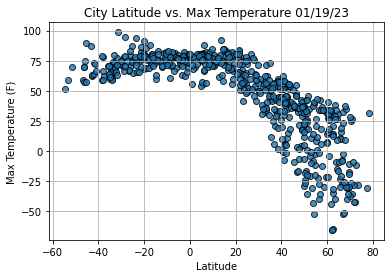

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

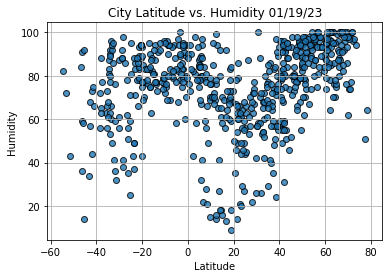

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

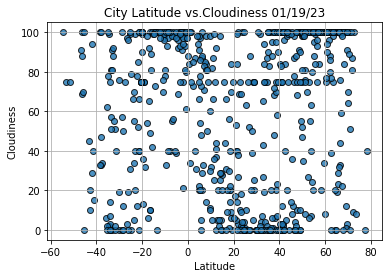

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

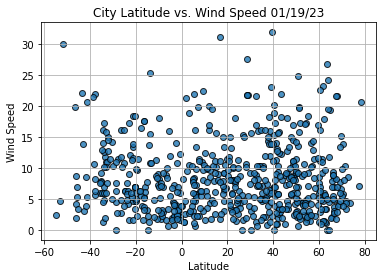

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [55]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [62]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The p-value is: {p_value:.3f}. \n The r-value is {r_value:.3f}.")
    

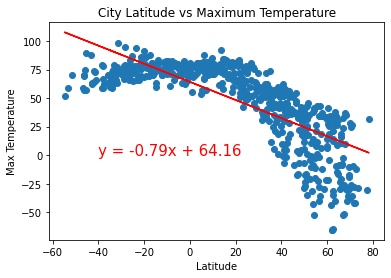

The p-value is: 0.000. 
 The r-value is -0.758.


In [63]:
plot_linear_regression(lats, max_temps, 'City Latitude vs Maximum Temperature', 'Max Temperature', (-40,0))

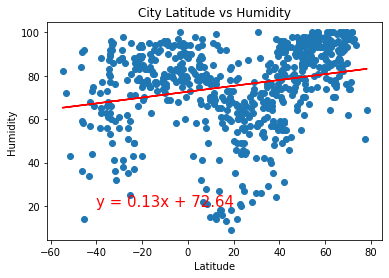

The p-value is: 0.000. 
 The r-value is 0.229.


In [64]:
plot_linear_regression(lats, humidity, 'City Latitude vs Humidity', 'Humidity', (-40,20))

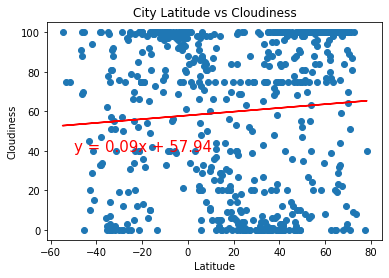

The p-value is: 0.046. 
 The r-value is 0.080.


In [65]:
plot_linear_regression(lats, cloudiness, 'City Latitude vs Cloudiness', 'Cloudiness', (-50,40))

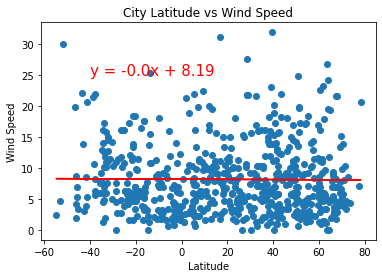

The p-value is: 0.818. 
 The r-value is -0.009.


In [66]:
plot_linear_regression(lats, wind_speed, 'City Latitude vs Wind Speed', 'Wind Speed', (-40,25))

In [45]:
# Get northern hemisphere data and create df

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Krasnozavodsk,RU,2023-01-19 22:03:06,56.4500,38.2167,34.14,98,100,14.00
4,Seoul,KR,2023-01-19 22:03:07,37.5683,126.9778,33.19,57,68,14.34
5,Jamestown,US,2023-01-19 21:57:22,42.0970,-79.2353,45.99,59,96,1.99
6,Nikolskoye,RU,2023-01-19 22:03:08,59.7035,30.7861,33.80,93,100,3.96
8,Silvino Lobos,PH,2023-01-19 22:03:09,12.3000,124.8333,73.74,99,92,4.29


In [46]:
# Create Southern hemishpreer df
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cidreira,BR,2023-01-19 22:03:05,-30.1811,-50.2056,74.64,87,76,14.18
1,Kruisfontein,ZA,2023-01-19 22:03:05,-34.0033,24.7314,68.88,92,1,4.85
2,Rikitea,PF,2023-01-19 21:59:39,-23.1203,-134.9692,77.67,71,99,1.54
7,Bredasdorp,ZA,2023-01-19 22:03:08,-34.5322,20.0403,66.72,83,2,1.32
9,Ngunguru,NZ,2023-01-19 22:03:09,-35.6167,174.5000,70.48,63,6,5.97


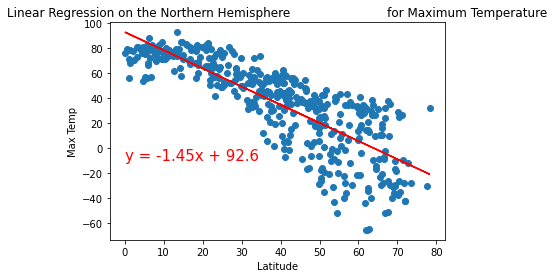

The p-value is: 0.000. 
 The r-value is -0.817.


In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-10))

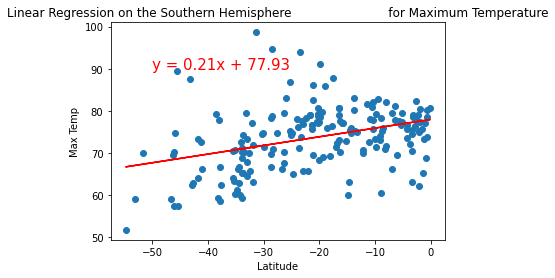

The p-value is: 0.000. 
 The r-value is 0.365.


In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

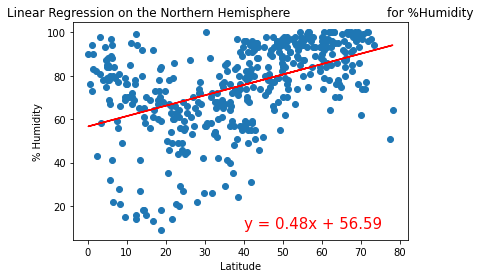

The p-value is: 0.000. 
 The r-value is 0.472.


In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for %Humidity', '% Humidity',(40,10))

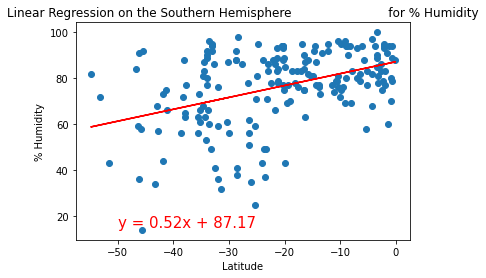

The p-value is: 0.000. 
 The r-value is 0.413.


In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

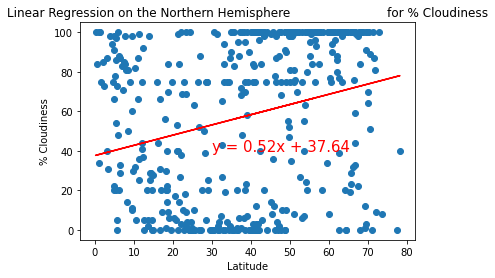

The p-value is: 0.000. 
 The r-value is 0.260.


In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,40))

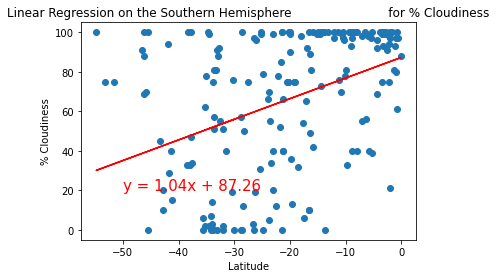

The p-value is: 0.000. 
 The r-value is 0.391.


In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

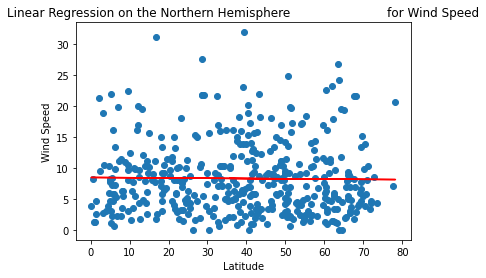

The p-value is: 0.754. 
 The r-value is -0.015.


In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

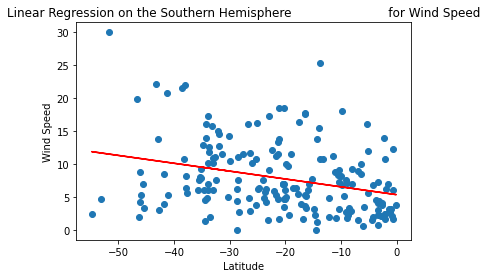

The p-value is: 0.000. 
 The r-value is -0.296.


In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))